# Autor: Josep Añó Gosp
##**JOBarcelona ’22**
##El reto consiste en una clasificación multiclase dados unos parámetros.
###Para ello contamos con un dataset de entrenamiento con columna de la clase y otro dataset de test sin esta columna clase.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("drive/MyDrive/JOBarcelona22/train.csv" )
#train = pd.read_csv("train.csv" )
print(train)

      Unnamed: 0  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0              0    22       26    119.910995   242.838324   -316.819222   
1              1    10       16    -90.790536  -269.470767   -182.581844   
2              2    21       42    -20.028003  -147.070212     50.280872   
3              3    21       17    -21.258567     0.467070    -86.164153   
4              4    18       16    -58.154501   -13.051195   -156.501167   
...          ...   ...      ...           ...          ...           ...   
6996        6996    21        0      6.576106   301.050638    146.682819   
6997        6997    18       57     -6.169382  -317.652257   -161.644320   
6998        6998    22       47     -7.289684  -406.732525   -212.097250   
6999        6999    18       14    -92.317105  -191.555040     88.371271   
7000        7000    21       31    -72.083585   -11.434977    -52.961743   

      Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  
0            250

# OBSERVAMOS LA CANTIDAD DE CADA CLASE, INSECT.
### SE ENCUENTRA DESBALANCEADA

[3519 2793  689]
[50.24271845 39.87721302  9.83723587]


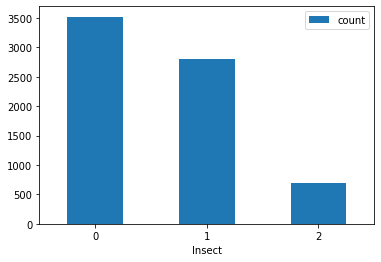

In [3]:
(unique, counts) = np.unique(train["Insect"], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies[:,1])
df = pd.DataFrame(frequencies, columns = ['Insect','count'])
ax = df.plot.bar(x='Insect', y='count', rot=0)
print((frequencies[:,1]/frequencies.sum())*100)

# ESTUDIAMOS LOS DATOS, DISTRIBUCIÓN




count    7001.000000
mean       19.598914
std         3.507008
min         1.000000
25%        19.000000
50%        21.000000
75%        21.000000
max        23.000000
Name: Hour, dtype: float64


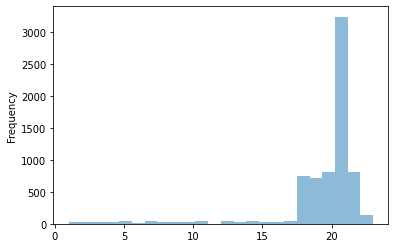

In [4]:
print(train.Hour.describe())
#La hora no sigue una distribucion normal, ya que la media es 19.598
ax = train.Hour.plot.hist(bins=24, alpha=0.5)

count    7001.000000
mean       29.405942
std        17.375830
min         0.000000
25%        14.000000
50%        29.000000
75%        44.000000
max        59.000000
Name: Minutes, dtype: float64


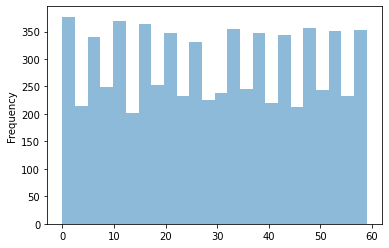

In [5]:
print(train.Minutes.describe())
ax = train.Minutes.plot.hist(bins=24, alpha=0.5)
#Media 29.4, los minutos siguen una distribucion correcta

count    7001.000000
mean        0.477171
std        99.294856
min      -404.898823
25%       -68.573905
50%        -0.287447
75%        66.480795
max       351.256221
Name: Sensor_alpha, dtype: float64


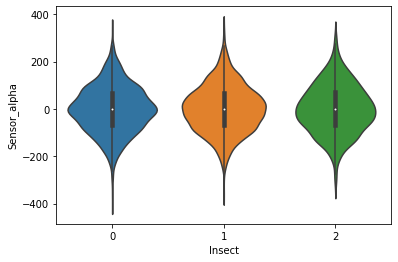

In [6]:
print(train.Sensor_alpha.describe())
sns.violinplot(x="Insect", y="Sensor_alpha", data=train)

count    7001.000000
mean      -29.974117
std       133.095125
min      -656.272666
25%      -116.060383
50%       -36.171567
75%        56.637778
max       518.395878
Name: Sensor_beta, dtype: float64


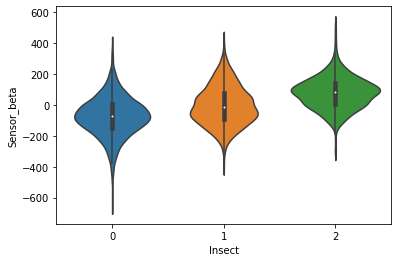

In [7]:
print(train.Sensor_beta.describe())
sns.violinplot(x="Insect", y="Sensor_beta", data=train)

count    7001.000000
mean       -5.624690
std       115.871391
min      -448.478039
25%       -83.508747
50%        -1.217606
75%        76.870277
max       378.349287
Name: Sensor_gamma, dtype: float64


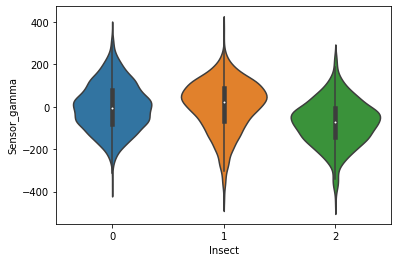

In [8]:
print(train.Sensor_gamma.describe())
sns.violinplot(x="Insect", y="Sensor_gamma", data=train)

count    7001.000000
mean        7.188060
std       122.327980
min      -437.205393
25%       -79.496687
50%        -1.133567
75%        93.285286
max       462.556319
Name: Sensor_alpha_plus, dtype: float64


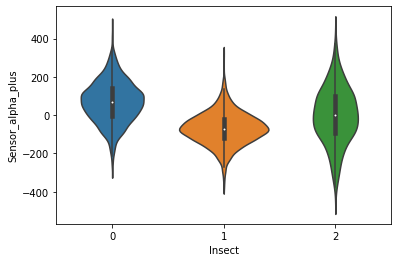

In [9]:
print(train.Sensor_alpha_plus.describe())
sns.violinplot(x="Insect", y="Sensor_alpha_plus", data=train)

count    7001.000000
mean       -0.757901
std       100.039477
min      -387.567443
25%       -68.061596
50%        -0.444124
75%        66.181909
max       345.279240
Name: Sensor_beta_plus, dtype: float64


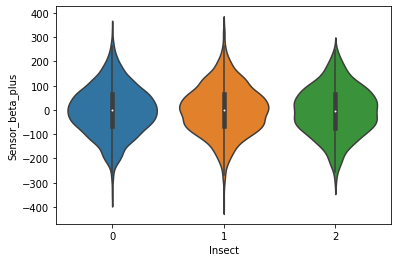

In [10]:
print(train.Sensor_beta_plus.describe())
sns.violinplot(x="Insect", y="Sensor_beta_plus", data=train)

count    7001.000000
mean       -0.554533
std       100.535951
min      -374.961689
25%       -69.652647
50%         0.027128
75%        67.838524
max       363.682391
Name: Sensor_gamma_plus, dtype: float64


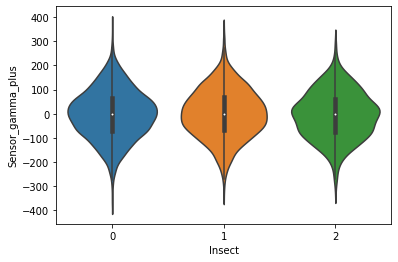

In [11]:
print(train.Sensor_gamma_plus.describe())
sns.violinplot(x="Insect", y="Sensor_gamma_plus", data=train)

# Las distribuciones más interesantes, donde se diferencian los parametros segun la clase son: Sensor_beta,Sensor_alpha_plus, "Sensor_gamma"
## Creamos gráfico 3D

In [12]:
fig = px.scatter_3d(train, x='Sensor_gamma', y='Sensor_beta', z='Sensor_alpha_plus',
              color='Insect')
fig.update_traces(marker_size = 3)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



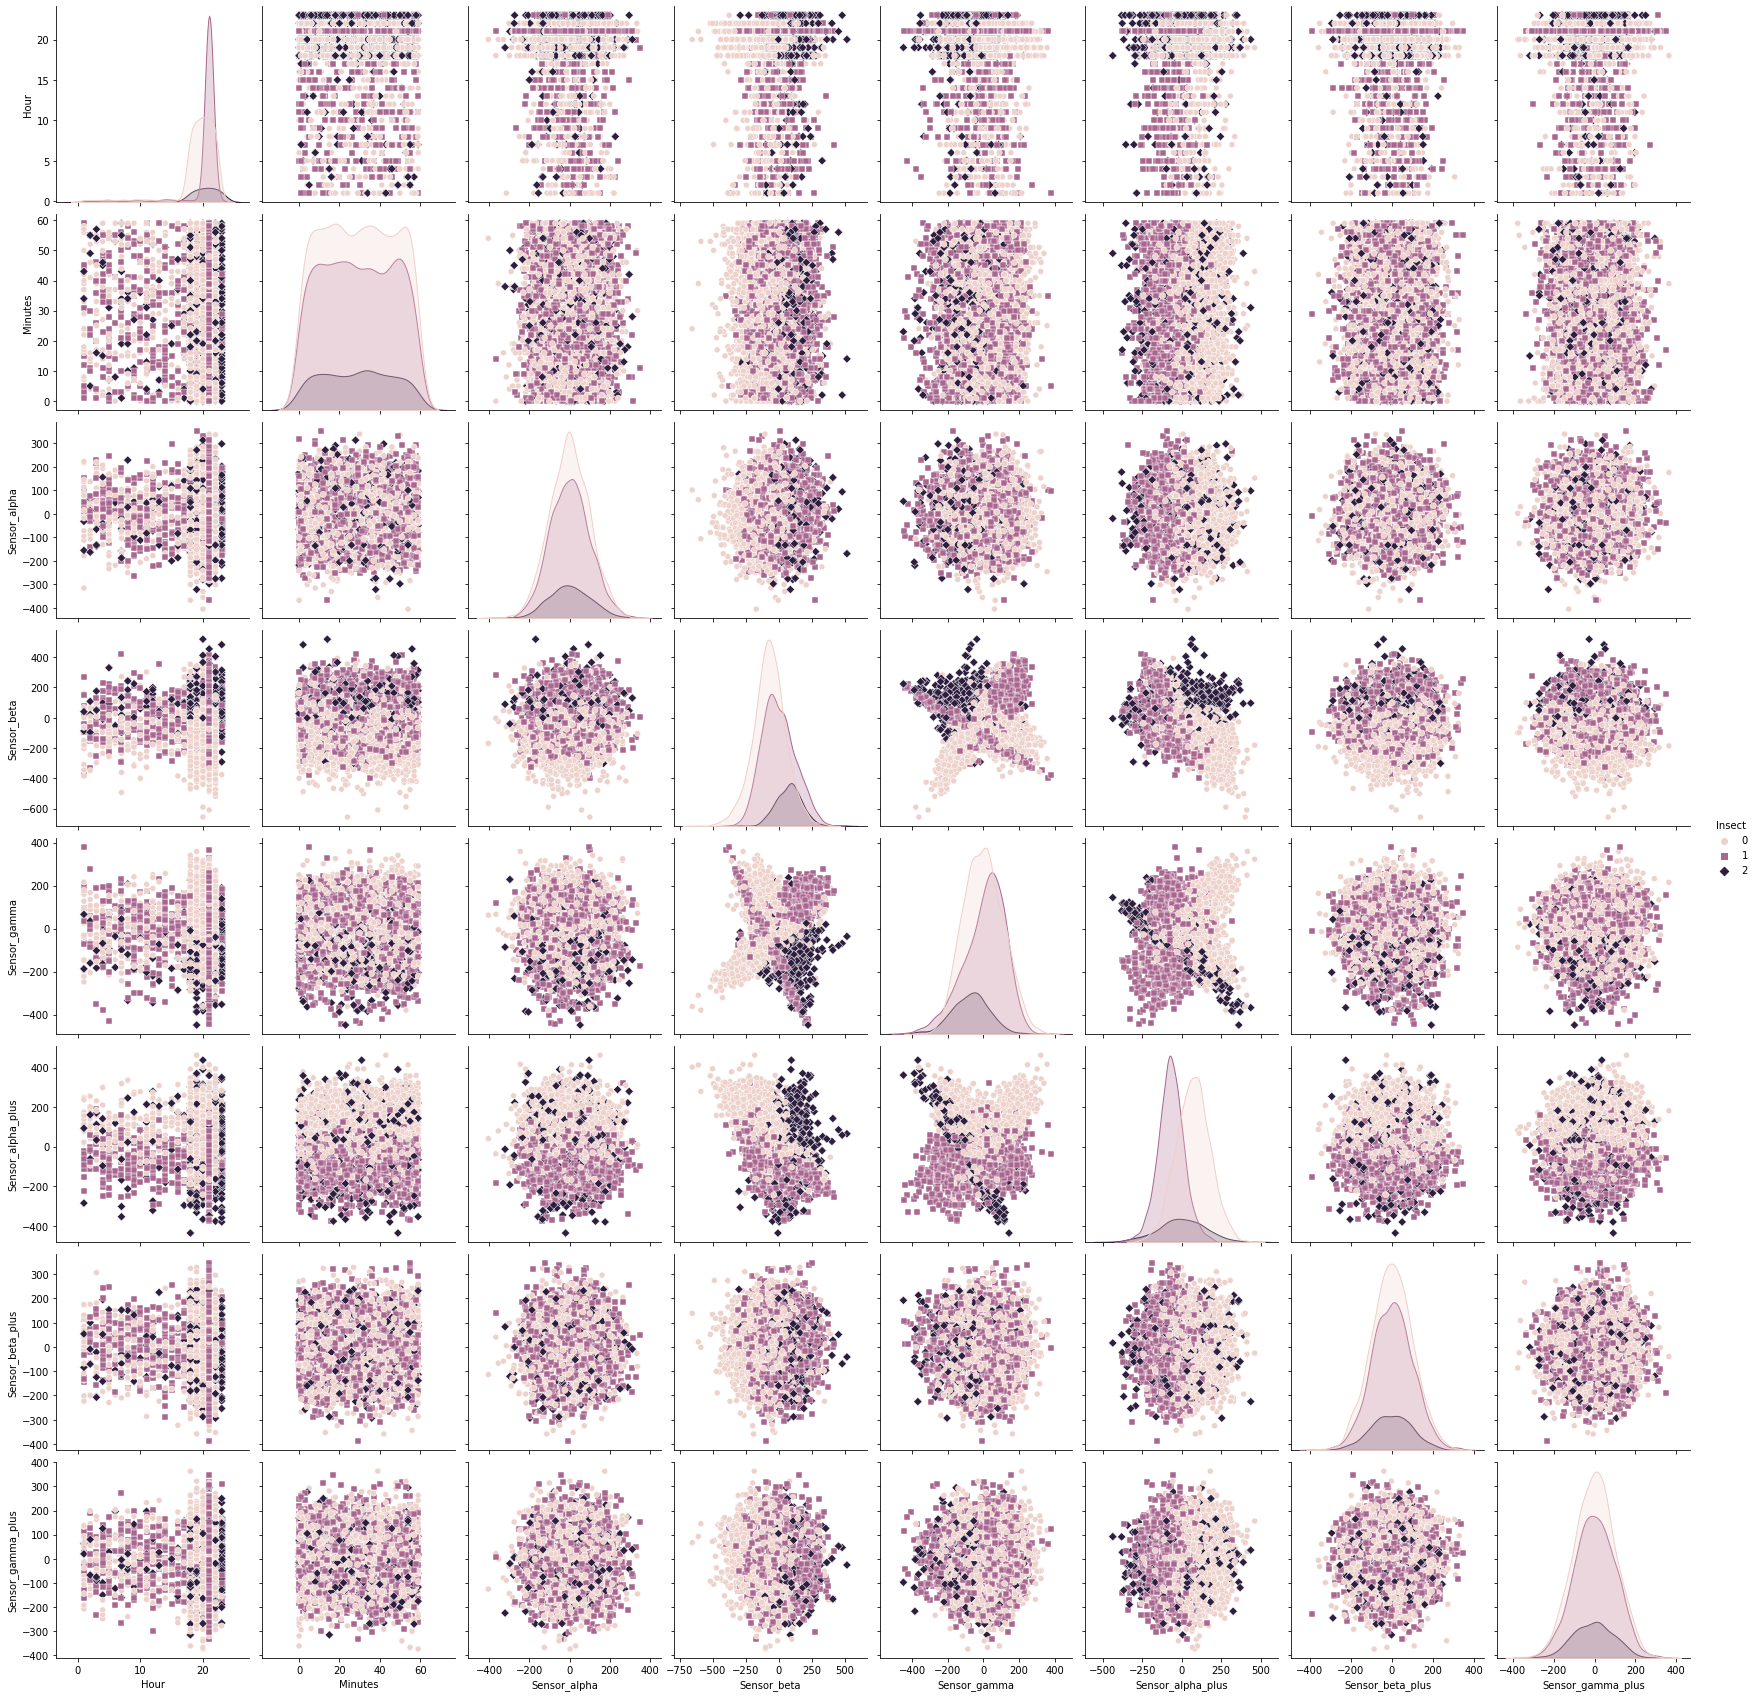

In [13]:
train_pair=train.drop(["Unnamed: 0"], axis = 1)
sns.pairplot(train_pair, hue="Insect", size=3, markers=["o", "s", "D"])

# PROBAMOS MODELOS, AL MEJOR REALIZAREMOS GRID
### DEBIDO A LAS CLASES DESBALANCEADAS, CIERTOS MODELOS TOLERARAN ESTE DESBALANCEO, EN CAMBIO PARA OTROS MODELOS SE DEBERÍA GENERAR DATOS ARTIFICIALES PARA IGUALAR LAS CLASES

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_pair, test_size = 0.2)
train.shape

(5600, 9)

In [15]:
train_x=train[[ 'Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta',
       'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus',
       'Sensor_gamma_plus']]
test_x=test[[ 'Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta',
       'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus',
       'Sensor_gamma_plus']]
train_y=train.Insect.values
test_y=test.Insect.values

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the KNN is')
print(classification_report(test_y,prediction))

The accuracy of the KNN is
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       667
           1       0.78      0.81      0.80       590
           2       0.76      0.47      0.58       144

    accuracy                           0.78      1401
   macro avg       0.77      0.70      0.73      1401
weighted avg       0.78      0.78      0.78      1401



In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(train_x, train_y)
prediction=clf.predict(test_x)
print('The accuracy of the RandomForestClassifier is:')
print(classification_report(test_y,prediction))

The accuracy of the RandomForestClassifier is:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       667
           1       0.80      0.77      0.79       590
           2       0.00      0.00      0.00       144

    accuracy                           0.75      1401
   macro avg       0.51      0.56      0.53      1401
weighted avg       0.68      0.75      0.71      1401



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the Decision Tree is')
print(classification_report(test_y,prediction))

The accuracy of the Decision Tree is
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       667
           1       0.90      0.88      0.89       590
           2       0.57      0.65      0.61       144

    accuracy                           0.84      1401
   macro avg       0.78      0.80      0.78      1401
weighted avg       0.85      0.84      0.85      1401



In [33]:
import xgboost as xgb
params = {
        'n_estimators':600,
        'min_child_weight': 1.0,
        'learning_rate': 0.1,
        'gamma': 0.5,
        'subsample': 1,
        'colsample_bytree': 1,
        'max_depth':2,
        "objective":"multi:softprob",
        "random_state":42
        }
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(train_x, train_y)
pred_grid_XGB = xgb_model.predict(test_x)
print('The accuracy of the XGBoost is')
print(classification_report(test_y,pred_grid_XGB))

The accuracy of the XGBoost is
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       667
           1       0.90      0.95      0.93       590
           2       0.79      0.55      0.65       144

    accuracy                           0.89      1401
   macro avg       0.86      0.80      0.82      1401
weighted avg       0.88      0.89      0.88      1401



In [27]:
from sklearn.svm import SVC
model = SVC(random_state=42) 
model.fit(train_x,train_y) 
prediction=model.predict(test_x)
print('The accuracy of the SVC is:')
print(classification_report(test_y,prediction))

The accuracy of the SVC is:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       667
           1       0.79      0.88      0.83       590
           2       0.94      0.44      0.60       144

    accuracy                           0.82      1401
   macro avg       0.86      0.72      0.76      1401
weighted avg       0.83      0.82      0.81      1401



## BEST MODEL XGBOOST CON WEIGTHED AVG 0.90, EN EL CASO QUE ESTE DESBALANCEADO TAMBIÉN EL TEST
### DEBEMOS ESTUDIAR EL TEST PRIMERO

In [28]:
test_test_x = pd.read_csv("drive/MyDrive/JOBarcelona22/test_x.csv" )
#test_test_x = pd.read_csv("test_x.csv" )
test_test_x=test_test_x.drop(["Unnamed: 0"],axis=1)
print(test_test_x)

      Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0       21       31    -72.083585   -11.434977    -52.961743   
1       21        3   -193.619980    40.137081     85.419244   
2       22       31     42.578382   -51.613402    125.055611   
3       21       25    -64.150951   287.306752    -70.965473   
4       18       11    193.750787   -61.989533   -110.347066   
...    ...      ...           ...          ...           ...   
2995     3       26   -101.913083    87.337077     77.193476   
2996    21        6     52.424913   -37.107249    120.373905   
2997    21        0   -103.295133    34.736979   -195.018118   
2998    20       13    170.027159   -73.100306   -117.330651   
2999    19       17   -173.839238    66.386097   -141.968498   

      Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  
0            -72.696385        145.299227        -143.856243  
1            -26.266801       -125.391237          80.904973  
2            182.136746         -9.726951 

### PREDICION RAPIDA PARA COMPROBAR DISTRIBUCIÓN

3000
[[   0 1498]
 [   1 1300]
 [   2  202]]
[49.93333333 43.33333333  6.73333333]


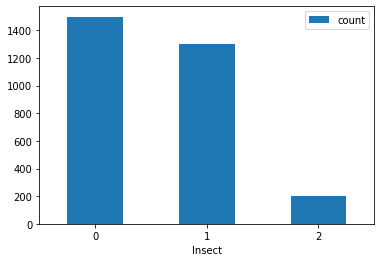

In [29]:
pred_grid = xgb_model.predict(test_test_x)
(unique, counts) = np.unique(pred_grid, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies.sum()-3)
print(frequencies)
df = pd.DataFrame(frequencies, columns = ['Insect','count'])
ax = df.plot.bar(x='Insect', y='count', rot=0)
print((frequencies[:,1]/(frequencies.sum()-3))*100)

### LA DISTRUCIÓN ES SIMILAR, BAJA DE 9 A 7 LA CLASE 2 Y SUBE DE 39 A 42 LA CLASE 1

#GRID XGBOOST
### TIEMPO DE COMPUTACIÓN ELEVADO

In [30]:
'''
import xgboost as xgb
param_grid = params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
       'n_estimators':[300, 600],
       'learning_rate': [0.02,0.05]
        }
   
xgb_model = GridSearchCV(xgb.XGBClassifier( random_state=42), param_grid, refit = True, verbose=0)
xgb_model.fit(train_x, train_y)
pred_grid_XGB = xgb_model.predict(test_x)
print(xgb_model.best_estimator_)
print(xgb_model.best_params_)
print(classification_report(test_y,pred_grid_XGB))
'''
###BET RESULT 
#{'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 600, 'subsample': 0.8}

"\nimport xgboost as xgb\nparam_grid = params = {\n        'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5],\n       'n_estimators':[300, 600],\n       'learning_rate': [0.02,0.05]\n        }\n   \nxgb_model = GridSearchCV(xgb.XGBClassifier( random_state=42), param_grid, refit = True, verbose=0)\nxgb_model.fit(train_x, train_y)\npred_grid_XGB = xgb_model.predict(test_x)\nprint(xgb_model.best_estimator_)\nprint(xgb_model.best_params_)\nprint(classification_report(test_y,pred_grid_XGB))\n"

In [34]:
import xgboost as xgb
params = {
        'n_estimators':600,
        'min_child_weight': 5.0,
        'learning_rate': 0.05,
        'gamma': 2,
        'subsample': 0.8,
        'colsample_bytree': 1,
        'max_depth':5,
        "objective":"multi:softprob",
        "random_state":42
        }
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(train_x, train_y)
pred_grid_XGB = xgb_model.predict(test_x)
print('The accuracy of the XGBoost is')
print(classification_report(test_y,pred_grid_XGB))

The accuracy of the XGBoost is
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       667
           1       0.92      0.96      0.94       590
           2       0.87      0.60      0.71       144

    accuracy                           0.90      1401
   macro avg       0.89      0.83      0.85      1401
weighted avg       0.90      0.90      0.90      1401



#GENERAR RESULT.CSV

In [32]:
pred_grid = xgb_model.predict(test_test_x)
salida= pd.DataFrame(np.vstack(pred_grid),columns=["Insect"])
salida.to_csv("results.csv")  
print(salida)

      Insect
0          1
1          1
2          0
3          2
4          0
...      ...
2995       1
2996       0
2997       1
2998       0
2999       2

[3000 rows x 1 columns]
